## 1. SmilesToImage Featuriser

In [1]:
#Import Statements
import deepchem as dc
from rdkit import Chem
from rdkit.Chem import Draw
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses

import pandas as pd

from matplotlib import pyplot as plt

import numpy as np

from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import (precision_recall_curve, average_precision_score, PrecisionRecallDisplay)
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

2023-04-10 15:30:02.276263: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Loading Tox21 dataset using SmilesToImage featuriser

Tox21 Assay List: <br>
<ol>
    <li> NR-AR </li>
    <li> NR-AR-LBD </li>
    <li> NR-AhR </li>
    <li> NR-Aromatase </li>
    <li> NR-ER </li>
    <li> NR-ER-LBD </li>
    <li> NR-PPAR-gamma </li>
    <li> SR-ARE </li>
    <li> SR-ATAD5 </li>
    <li> SR-HSE </li>
    <li> SR-MMP </li>
    <li> SR-p53 </li>
</ol>

In [2]:
# #Checking deepchem version
# dc.__version__

In [3]:
#SmilesToImage Featuriser
tasks, datasets, transformers = dc.molnet.load_tox21(
    featurizer = dc.feat.SmilesToImage(img_size=80, img_spec='std'),
    save_dir=r'C:\Users\ym20201\Documents\Datasets',
    data_dir=r'C:\Users\ym20201\Documents\Datasets')

splitter = dc.splits.RandomSplitter()

train_data, valid_data, test_data = datasets

### Visualising the molecules in the dataset

The featurised inputs are 2-dimensional so they can be used in pre-built functions were used to output the molecular structures.

In [33]:
train_data.ids[5]

'C=C(C)C(=O)OCCOC(=O)C(=C)C'

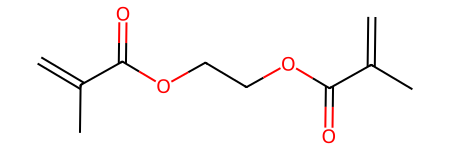

In [4]:
#Printing the molecule using the given SMILES string input
Chem.MolFromSmiles(train_data.ids[5])

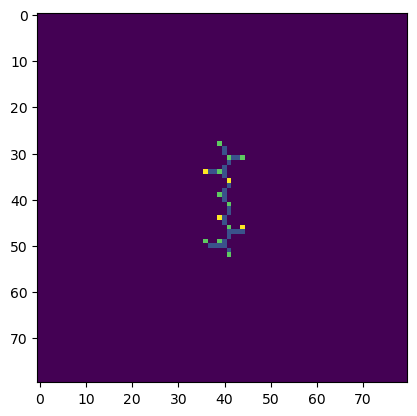

In [5]:
#Visualising the featurised input as an image
plt.imshow(train_data.X[5], interpolation='nearest')

## Convolutional Neural Network (CNN) model

In [6]:
#Model 1 - 2 layered CNN
smiles2img_model1 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filters=[100,100],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200], #number of units inside [] indicate number of layers
    activation_fns=['relu'],
    uncertainty=False,
    residual=False,
    padding='valid') 

2023-04-07 16:15:27.453185: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [67]:
#Model 2
smiles2img_model2 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filters=[100,100],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[1000,500], #increased layer size
    activation_fns=['relu'],
    uncertainty=False,
    residual=False,
    padding='valid') 

2023-04-10 21:27:17.228186: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
#Model 3 - Model 1 with added max pooling layer
smiles2img_model3 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filters=[100,100],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200], 
    activation_fns=['relu'],
    uncertainty=False,
    pool_type='max', #max pooling layer
    residual=False,
    padding='valid') 

In [9]:
#Model 4 - increased number of layers to 3 layers
smiles2img_model4 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filter=[1000,500,100], 
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200,200],
    activation_fns=['relu'],
    uncertainty=False,
    residual=False,
    padding='valid') 

In [68]:
#Model 5 - model 4 with max pooling
smiles2img_model5 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filter=[1000,500,100], 
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200,200],
    activation_fns=['relu'],
    uncertainty=False,
    pool_type='max',
    residual=False,
    padding='valid') 

In [11]:
#Model 6 - testing different amounts of dropout
smiles2img_model6 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filter=[500,500,200],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=[0.5, 0.0,0.0], 
    dense_layer_size=[500,200,100],
    activation_fns=['relu'],
    uncertainty=False,
    pool_type='max',
    residual=False,
    padding='valid') 

In [69]:
#Model 7
smiles2img_model7 = dc.models.CNN(
    n_tasks = len(tasks), # Num of tasks, i.e. width of y
    n_features=len(train_data.X[2]), # number of features, i.e. width of X
    dims=1,
    layer_filter=[500,500,200],
    mode='classification',
    weight_init_stddevs=0.02, 
    bias_init_consts=1.0,
    dropouts=0.5,
    dense_layer_size=[500,200,100],
    activation_fns=['relu'],
    uncertainty=False,
    pool_type='max',
    residual=False,
    padding='valid') 

To select the best performing models, each CNN model was evaluated using balanced accuracy, recall and f1-score.

In [70]:
#Fitting models with best performance - Models 2, 5, 7
smiles2img_model2.fit(
    train_data,
    nb_epoch=10)

smiles2img_model5.fit(
    train_data,
    nb_epoch=10)

smiles2img_model7.fit(
    train_data,
    nb_epoch=10)

0.95189208984375

In [14]:
#Evaluation Metrics
metric = dc.metrics.Metric(dc.metrics.balanced_accuracy_score)
metric1 = dc.metrics.Metric(dc.metrics.recall_score)
metric2 = dc.metrics.Metric(dc.metrics.f1_score)

smiles2img_model7.evaluate(test_data, [metric, metric1, metric2], transformers)

{'balanced_accuracy_score': 0.5514503577574841,
 'recall_score': 0.5394181353887028,
 'f1_score': 0.14129331116252683}

In [71]:
#Using the models for prediction
m2_pred_data = smiles2img_model2.predict(test_data)
m5_pred_data = smiles2img_model5.predict(test_data)
m7_pred_data = smiles2img_model7.predict(test_data)

Functions were used to access the true values and predicted values of each assay from the test dataset. The values were compiled into an array of y_true and y_pred values to be used for plotting.

In [72]:
#Function for accessing y_true of each assay
def y_true(assay_num, test_data):
    y_true = []
    for i in range(len(test_data.y)):
        y_true.append(test_data.y[i][assay_num - 1])
        
    return y_true

#Function for accessing y_pred of each assay
def y_pred(assay_num, pred_data):
    y_pred = []
    for i in range(len(pred_data)):
        y_pred.append( pred_data[i][assay_num - 1][0])
    
    return y_pred

In [73]:
#y_true of each assay
y_true_1 = y_true(1, test_data)
y_true_2 = y_true(2, test_data)
y_true_3 = y_true(3, test_data)
y_true_4 = y_true(4, test_data)
y_true_5 = y_true(5, test_data)
y_true_6 = y_true(6, test_data)
y_true_7 = y_true(7, test_data)
y_true_8 = y_true(8, test_data)
y_true_9 = y_true(9, test_data)
y_true_10 = y_true(10, test_data)
y_true_11 = y_true(11, test_data)
y_true_12 = y_true(12, test_data)

In [74]:
y_true = [y_true_1, y_true_2, y_true_3, y_true_4, y_true_5, 
        y_true_6, y_true_7, y_true_8, y_true_9, y_true_10,
        y_true_11, y_true_12]

The numbers following each variable indicates which assay the values are for, for example, 'y_true_2' are the true values for the 2nd assay - NR-AR-LBD.

### Model 2 - y_pred

In [75]:
#y_pred of each assay
m2_y_pred_1 = y_pred(1, m2_pred_data)
m2_y_pred_2 = y_pred(2, m2_pred_data)
m2_y_pred_3 = y_pred(3, m2_pred_data)
m2_y_pred_4 = y_pred(4, m2_pred_data)
m2_y_pred_5 = y_pred(5, m2_pred_data)
m2_y_pred_6 = y_pred(6, m2_pred_data)
m2_y_pred_7 = y_pred(7, m2_pred_data)
m2_y_pred_8 = y_pred(8, m2_pred_data)
m2_y_pred_9 = y_pred(9, m2_pred_data)
m2_y_pred_10 = y_pred(10, m2_pred_data)
m2_y_pred_11 = y_pred(11, m2_pred_data)
m2_y_pred_12 = y_pred(12, m2_pred_data)

The predicted probabilities for toxicity had to be rounded to binary values, to be compatible for comparison with the y_true values, which are already binary values. This step was repeated for the other two models.

In [108]:
#Function to round predicted probabilities to binary values - 0 (non-toxic), 1 (toxic)
def round_pred(y_pred):
    y_pred_new = []
    for i in range(len(y_pred)):
        if y_pred[i] < 0.5:
            new = 0
        else:
            new = 1
        y_pred_new.append(new)
    return y_pred_new

In [109]:
m2_y_pred_new_1 = round_pred(m2_y_pred_1)
m2_y_pred_new_2 = round_pred(m2_y_pred_2)
m2_y_pred_new_3 = round_pred(m2_y_pred_3)
m2_y_pred_new_4 = round_pred(m2_y_pred_4)
m2_y_pred_new_5 = round_pred(m2_y_pred_5)
m2_y_pred_new_6 = round_pred(m2_y_pred_6)
m2_y_pred_new_7= round_pred(m2_y_pred_7)
m2_y_pred_new_8 = round_pred(m2_y_pred_8)
m2_y_pred_new_9 = round_pred(m2_y_pred_9)
m2_y_pred_new_10 = round_pred(m2_y_pred_10)
m2_y_pred_new_11 = round_pred(m2_y_pred_11)
m2_y_pred_new_12 = round_pred(m2_y_pred_12)

In [111]:
m2_y_pred = [m2_y_pred_1, m2_y_pred_2, m2_y_pred_3, m2_y_pred_4, m2_y_pred_5, 
             m2_y_pred_6, m2_y_pred_7, m2_y_pred_8, m2_y_pred_9, m2_y_pred_10,
            m2_y_pred_11, m2_y_pred_12]

m2_y_pred_new = [m2_y_pred_new_1, m2_y_pred_new_2, m2_y_pred_new_3, m2_y_pred_new_4, m2_y_pred_new_5, 
             m2_y_pred_new_6, m2_y_pred_new_7, m2_y_pred_new_8, m2_y_pred_new_9, m2_y_pred_new_10,
            m2_y_pred_new_11, m2_y_pred_new_12]

In [130]:
m2_y_pred #continuous values

[[0.60620284,
  0.3782004,
  0.51379853,
  0.5729983,
  0.8082917,
  0.6219848,
  0.35754928,
  0.6030597,
  0.6184408,
  0.5389011,
  0.47709715,
  0.68500155,
  0.37196818,
  0.84473544,
  0.58337677,
  0.4464229,
  0.5934474,
  0.41070953,
  0.5639342,
  0.5716887,
  0.65800154,
  0.2829146,
  0.56083024,
  0.75940335,
  0.61113393,
  0.75598013,
  0.4964202,
  0.72755826,
  0.82161653,
  0.5706868,
  0.7039669,
  0.677521,
  0.7627779,
  0.7289502,
  0.4420298,
  0.615925,
  0.46350843,
  0.5609744,
  0.6327209,
  0.7534817,
  0.7916904,
  0.49319988,
  0.53016007,
  0.54221547,
  0.46276015,
  0.6321543,
  0.547029,
  0.9680798,
  0.54682463,
  0.4775921,
  0.37922966,
  0.56746346,
  0.72326785,
  0.601526,
  0.7263888,
  0.89218736,
  0.41039973,
  0.62578326,
  0.6357636,
  0.49948323,
  0.6825592,
  0.4818528,
  0.61153793,
  0.49865395,
  0.642234,
  0.50895756,
  0.5406593,
  0.5244085,
  0.51890403,
  0.5051157,
  0.6219586,
  0.5724487,
  0.60322505,
  0.6033843,
  0.47232

In [113]:
m2_y_pred_new #rounded binary values

[[1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,


### Model 5 - y_pred

In [83]:
#y_pred of each assay
m5_y_pred_1 = y_pred(1, m5_pred_data)
m5_y_pred_2 = y_pred(2, m5_pred_data)
m5_y_pred_3 = y_pred(3, m5_pred_data)
m5_y_pred_4 = y_pred(4, m5_pred_data)
m5_y_pred_5 = y_pred(5, m5_pred_data)
m5_y_pred_6 = y_pred(6, m5_pred_data)
m5_y_pred_7 = y_pred(7, m5_pred_data)
m5_y_pred_8 = y_pred(8, m5_pred_data)
m5_y_pred_9 = y_pred(9, m5_pred_data)
m5_y_pred_10 = y_pred(10, m5_pred_data)
m5_y_pred_11 = y_pred(11, m5_pred_data)
m5_y_pred_12 = y_pred(12, m5_pred_data)

In [84]:
#Rounding predicted probabilities to binary values
m5_y_pred_new_1 = round_pred(m5_y_pred_1)
m5_y_pred_new_2 = round_pred(m5_y_pred_2)
m5_y_pred_new_3 = round_pred(m5_y_pred_3)
m5_y_pred_new_4 = round_pred(m5_y_pred_4)
m5_y_pred_new_5 = round_pred(m5_y_pred_5)
m5_y_pred_new_6 = round_pred(m5_y_pred_6)
m5_y_pred_new_7= round_pred(m5_y_pred_7)
m5_y_pred_new_8 = round_pred(m5_y_pred_8)
m5_y_pred_new_9 = round_pred(m5_y_pred_9)
m5_y_pred_new_10 = round_pred(m5_y_pred_10)
m5_y_pred_new_11 = round_pred(m5_y_pred_11)
m5_y_pred_new_12 = round_pred(m5_y_pred_12)

In [85]:
m5_y_pred = [m5_y_pred_1, m5_y_pred_2, m5_y_pred_3, m5_y_pred_4, m5_y_pred_5, 
             m5_y_pred_6, m5_y_pred_7, m5_y_pred_8, m5_y_pred_9, m5_y_pred_10,
            m5_y_pred_11, m5_y_pred_12]

m5_y_pred_new = [m5_y_pred_new_1, m5_y_pred_new_2, m5_y_pred_new_3, m5_y_pred_new_4, m5_y_pred_new_5, 
             m5_y_pred_new_6, m5_y_pred_new_7, m5_y_pred_new_8, m5_y_pred_new_9, m5_y_pred_new_10,
            m5_y_pred_new_11, m5_y_pred_new_12]

### Model 7 - y_pred

In [87]:
#y_pred of each assay
m7_y_pred_1 = y_pred(1, m7_pred_data)
m7_y_pred_2 = y_pred(2, m7_pred_data)
m7_y_pred_3 = y_pred(3, m7_pred_data)
m7_y_pred_4 = y_pred(4, m7_pred_data)
m7_y_pred_5 = y_pred(5, m7_pred_data)
m7_y_pred_6 = y_pred(6, m7_pred_data)
m7_y_pred_7 = y_pred(7, m7_pred_data)
m7_y_pred_8 = y_pred(8, m7_pred_data)
m7_y_pred_9 = y_pred(9, m7_pred_data)
m7_y_pred_10 = y_pred(10, m7_pred_data)
m7_y_pred_11 = y_pred(11, m7_pred_data)
m7_y_pred_12 = y_pred(12, m7_pred_data)

In [88]:
#Rounding predicted probabilities to binary values
m7_y_pred_new_1 = round_pred(m7_y_pred_1)
m7_y_pred_new_2 = round_pred(m7_y_pred_2)
m7_y_pred_new_3 = round_pred(m7_y_pred_3)
m7_y_pred_new_4 = round_pred(m7_y_pred_4)
m7_y_pred_new_5 = round_pred(m7_y_pred_5)
m7_y_pred_new_6 = round_pred(m7_y_pred_6)
m7_y_pred_new_7= round_pred(m7_y_pred_7)
m7_y_pred_new_8 = round_pred(m5_y_pred_8)
m7_y_pred_new_9 = round_pred(m7_y_pred_9)
m7_y_pred_new_10 = round_pred(m7_y_pred_10)
m7_y_pred_new_11 = round_pred(m7_y_pred_11)
m7_y_pred_new_12 = round_pred(m7_y_pred_12)

In [115]:
m7_y_pred = [m7_y_pred_1, m7_y_pred_2, m7_y_pred_3, m7_y_pred_4, m7_y_pred_5, 
             m7_y_pred_6, m7_y_pred_7, m7_y_pred_8, m7_y_pred_9, m7_y_pred_10,
            m7_y_pred_11, m7_y_pred_12]

m7_y_pred_new = [m7_y_pred_new_1, m7_y_pred_new_2, m7_y_pred_new_3, m7_y_pred_new_4, m7_y_pred_new_5, 
             m7_y_pred_new_6, m7_y_pred_new_7, m7_y_pred_new_8, m7_y_pred_new_9, m7_y_pred_new_10,
            m7_y_pred_new_11, m7_y_pred_new_12]

## Evaluating the model

The three models were evaluated using various evaluation metrics to select the best model for this featuriser.

### Precision and Recall score

In [116]:
#Function to ouput precision, recall, and average precision score
def precision_recall_score(y_true, y_pred):
    precision_score = []
    recall_score = []
    for i in range(len(y_true)):
        precision, recall, _ = precision_recall_curve(y_true[i], y_pred[i])
        
        precision_score.append(precision)
        recall_score.append(recall)
    
    return precision_score, recall_score

In [117]:
def PrecisionRecallPlot(precision, recall, assays):
    precision_recall = []
    for i in range(len(precision)):
        plot = PrecisionRecallDisplay(recall = recall[i], precision = precision[i])
        precision_recall.append(plot)
        
    for i in range(len(precision_recall)):
        precision_recall[i].plot(ax=ax, label=assays[i])

In [122]:
m2_precision_score, m2_recall_score = precision_recall_score(y_true, m2_y_pred)
m5_precision_score, m5_recall_score = precision_recall_score(y_true, m5_y_pred)
m7_precision_score, m7_recall_score = precision_recall_score(y_true, m7_y_pred)

In [123]:
assays = ['NR-AR', 'NR-AR-LBD','NR-AhR', 'NR-Aromatase', 'NR-ER', 'NR-ER-LBD', 'NR-PPAR-gamma',
         'SR-ARE', 'SR-ATAD5', 'SR-HSE', 'SR-MMP', 'SR-p53']

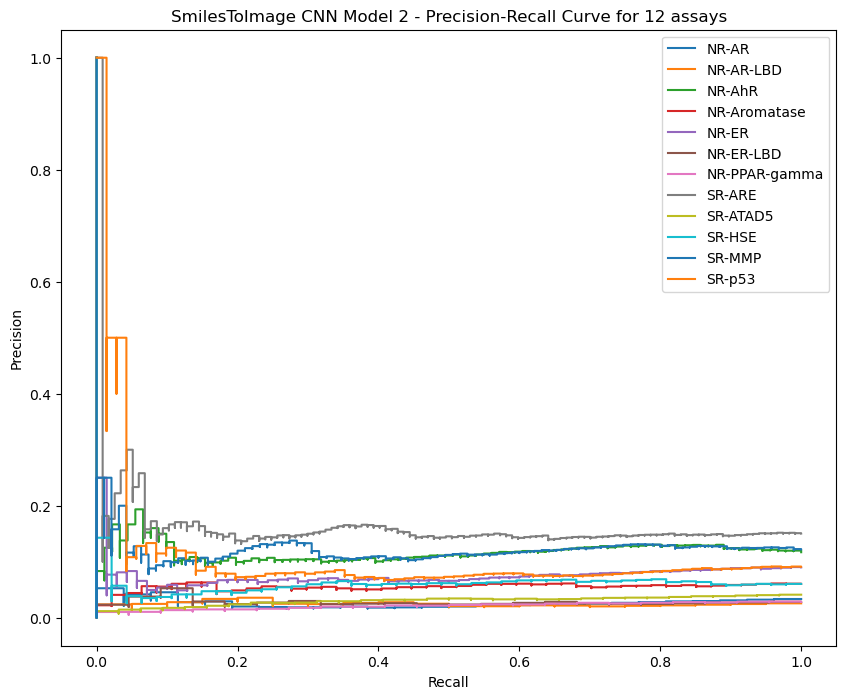

In [124]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m2_precision_score, m2_recall_score, assays)

plt.title('SmilesToImage CNN Model 2 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')
# plt.savefig('Smiles2IMG M2 P-R.png')

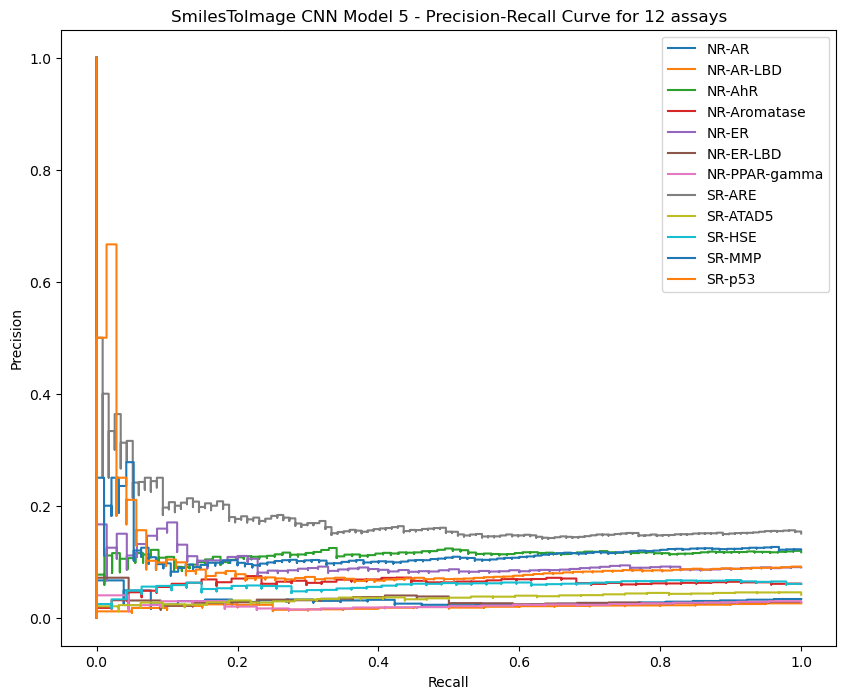

In [129]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m5_precision_score, m5_recall_score, assays)

plt.title('SmilesToImage CNN Model 5 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')
# plt.savefig('Smiles2IMG M5 P-R.png')

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

PrecisionRecallPlot(m7_precision_score, m7_recall_score,assays)

plt.title('SmilesToImage CNN Model 7 - Precision-Recall Curve for 12 assays') 
plt.legend(loc='upper right')
# plt.savefig('Smiles2IMG M7 P-R.png')

### Accuracy or Balanced Accuracy Score?

In [ ]:
# #Checking if tox21 is imbalanced

# from sklearn.metrics import accuracy_score
# from sklearn.metrics import balanced_accuracy_score

# #NR-AR Assay
# acc = accuracy_score(y_true_1, y_pred_new_1)
# b_acc = balanced_accuracy_score(y_true_1, y_pred_new_1)

# #NR-AR-LBD
# acc2 = accuracy_score(y_true_2, y_pred_new_2)
# b_acc2 = balanced_accuracy_score(y_true_2, y_pred_new_2)

# #NR-AhR
# acc3 = accuracy_score(y_true_3, y_pred_new_3)
# b_acc3 = balanced_accuracy_score(y_true_3, y_pred_new_3)

# print(acc, b_acc)
# print(acc2, b_acc2)
# print(acc3, b_acc3)

The difference in accuracy and balanced accuracy score proves that the Tox21 dataset is imbalanced (more non-toxic molecules than toxic molecues). <br> 
The balanced accuracy score is better at reflecting true model performance on imbalanced datasets - something accuracy score is poor at.

### Balanced Accuracy Score

In [ ]:
def balanced_accuracy(y_true, y_pred):
    balanced_acc = []
    for i in range(len(y_true)):
        b_acc = balanced_accuracy_score(y_true[i], y_pred[i])
        balanced_acc.append(b_acc)
    return balanced_acc

In [ ]:
m2_balanced_acc = balanced_accuracy(y_true, m2_y_pred_new)
m5_balanced_acc = balanced_accuracy(y_true, m5_y_pred_new)
m7_balanced_acc = balanced_accuracy(y_true, m7_y_pred_new)

In [ ]:
b_acc_means = [np.mean(m2_balanced_acc), np.mean(m5_balanced_acc), np.mean(m7_balanced_acc)]
b_acc_means

In [ ]:
b_acc_median = [np.median(m2_balanced_acc), np.median(m5_balanced_acc), np.median(m7_balanced_acc)]
b_acc_median

The mean and median balanced accuracy score was used to assess the predictive ability of the models.

In [ ]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_balanced_acc, width, label='Model 2', color='navy')
plt.bar(x, m5_balanced_acc, width, label='Model 5', color='gold')

plt.bar(x+0.2, m7_balanced_acc, width, label='Model 7', color='teal')
plt.title('SmilesToImage CNN Model - Balanced Accuracy Score of Tox21 Assays', fontsize=16)
plt.ylabel('Balanced Accuracy Score', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)

#Bar labels
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)

#Assay labels
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
# plt.savefig('Smiles2IMG BA.png')

In [ ]:
#Balanced Accuracy Score split into NR and SR panels
fig, ax = plt.subplots(2,1, figsize=(22,15))

ax1 = ax[0]
ax2 = ax[1]

width = 0.2

#NR Panel
x=np.arange(7)

ax1.bar(x-0.2, m2_balanced_acc[0:7], width, label='Model 2', color='navy')
ax1.bar(x, m5_balanced_acc[0:7], width, label='Model 5', color='gold')
ax1.bar(x+0.2, m7_balanced_acc[0:7], width, label='Model 7', color='teal')
ax1.set_title('SmilesToImage CNN Model - Balanced Accuracy Score of Tox21 NR Assays', fontsize=16)
ax1.set_ylabel('Balanced Accuracy Score', fontsize=14)
ax1.set_xlabel('Nuclear Receptor Panel', fontsize=14)
ax1.bar_label(ax1.containers[0], fmt='%.3f', fontsize=12)
ax1.bar_label(ax1.containers[1], fmt='%.3f', fontsize=12)
ax1.bar_label(ax1.containers[2], fmt='%.3f', fontsize=12)
ax1.set_xticks(x, assays[0:7], fontsize=12)
ax1.legend()


#SR Panel
x1=np.arange(5)

ax2.bar(x1-0.2, m2_balanced_acc[7:12], width, label='Model 2', color='navy')
ax2.bar(x1, m5_balanced_acc[7:12], width, label='Model 5', color='gold')
ax2.bar(x1+0.2, m7_balanced_acc[7:12], width, label='Model 7', color='teal')
ax2.set_title('SmilesToImage CNN Model - Balanced Accuracy Score of Tox21 SR Assays', fontsize=16)
ax2.set_ylabel('Balanced Accuracy Score', fontsize=14)
ax2.set_xlabel('Stress Response Panel', fontsize=14)
ax2.bar_label(ax2.containers[0], fmt='%.3f', fontsize=12)
ax2.bar_label(ax2.containers[1], fmt='%.3f', fontsize=12)
ax2.bar_label(ax2.containers[2], fmt='%.3f', fontsize=12)
ax2.set_xticks(x1, assays[7:12], fontsize=12)
ax2.legend()


### F1-Score

In [ ]:
def f1Score(y_true, y_pred):
    f1_Score = []
    for i in range(len(y_true)):
        f1 = f1_score(y_true[i], y_pred[i])
        f1_Score.append(f1)
    return f1_Score

In [ ]:
m2_f1 = f1Score(y_true, m2_y_pred_new)
m5_f1 = f1Score(y_true, m5_y_pred_new)
m7_f1 = f1Score(y_true, m7_y_pred_new)

In [ ]:
f1_means = [np.mean(m2_f1), np.mean(m5_f1), np.mean(m7_f1)]
f1_means

In [ ]:
f1_median = [np.median(m2_f1), np.median(m5_f1), np.median(m7_f1)]
f1_median

In [ ]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(20,10))

width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_f1, width, label='Model 2', color='navy')
plt.bar(x, m5_f1, width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_f1, width, label='Model 7', color='teal')

plt.title('SmilesToImage CNN Model - F1 Score of Tox21 Assays', fontsize=16)
plt.ylabel('F1 Score', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)

#Bar labels
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=12)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=12)

#Assay labels
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
# plt.savefig('Smiles2IMG F1.png')

In [ ]:
#F1 Score split into NR and SR panels
fig, ax = plt.subplots(2,1, figsize=(22,15))

ax1 = ax[0]
ax2 = ax[1]

width = 0.2

#NR Panel
x=np.arange(7)

ax1.bar(x-0.2, m2_f1[0:7], width, label='Model 2', color='navy')
ax1.bar(x, m5_f1[0:7], width, label='Model 5', color='gold')
ax1.bar(x+0.2, m7_f1[0:7], width, label='Model 7', color='teal')
ax1.set_title('SmilesToImage CNN Model - F1 Score of Tox21 NR Assays', fontsize=16)
ax1.set_ylabel('F1 Score', fontsize=14)
ax1.set_xlabel('Nuclear Receptor Panel', fontsize=14)
ax1.bar_label(ax1.containers[0], fmt='%.3f', fontsize=12)
ax1.bar_label(ax1.containers[1], fmt='%.3f', fontsize=12)
ax1.bar_label(ax1.containers[2], fmt='%.3f', fontsize=12)
ax1.set_xticks(x, assays[0:7], fontsize=12)
ax1.legend()


#SR Panel
x1=np.arange(5)

ax2.bar(x1-0.2, m2_f1[7:12], width, label='Model 2', color='navy')
ax2.bar(x1, m5_f1[7:12], width, label='Model 5', color='gold')
ax2.bar(x1+0.2, m7_f1[7:12], width, label='Model 7', color='teal')
ax2.set_title('SmilesToImage CNN Model - F1 Score of Tox21 SR Assays', fontsize=16)
ax2.set_ylabel('F1 Score', fontsize=14)
ax2.set_xlabel('Stress Response Panel', fontsize=14)
ax2.bar_label(ax2.containers[0], fmt='%.3f', fontsize=12)
ax2.bar_label(ax2.containers[1], fmt='%.3f', fontsize=12)
ax2.bar_label(ax2.containers[2], fmt='%.3f', fontsize=12)
ax2.set_xticks(x1, assays[7:12], fontsize=12)
ax2.legend()

### ROC-AUC Score

In [ ]:
# Area Under the Receiver Operating Characteristic(ROC) Curve
def roc_auc(y_true, y_pred):
    rocauc=[]
    for i in range(len(y_true)):
        auroc = roc_auc_score(y_true[i], y_pred[i])
        rocauc.append(auroc)
    return rocauc

In [ ]:
m2_roc_auc = roc_auc(y_true, m2_y_pred_new)
m5_roc_auc = roc_auc(y_true, m5_y_pred_new)
m7_roc_auc = roc_auc(y_true, m7_y_pred_new)

In [ ]:
roc_mean = [np.mean(m2_roc_auc), np.mean(m5_roc_auc), np.mean(m7_roc_auc)]
roc_mean

In [ ]:
roc_median = [np.median(m2_roc_auc), np.median(m5_roc_auc), np.median(m7_roc_auc)]
roc_median

In [ ]:
#Grouped bar plot
fig,ax = plt.subplots(figsize=(22,10))
width = 0.2

x=np.arange(12)
plt.bar(x-0.2, m2_roc_auc, width, label='Model 2', color='navy')
plt.bar(x, m5_roc_auc, width, label='Model 5', color='gold')
plt.bar(x+0.2, m7_roc_auc, width, label='Model 7', color='teal')

plt.title('SmilesToImage CNN Model - ROC-AUC of Tox21 Assays', fontsize=16)
plt.ylabel('ROC-AUC', fontsize=14)
plt.xlabel('Tox21 Assays', fontsize=14)

#Bar labels
plt.bar_label(ax.containers[0], fmt='%.3f', fontsize=11)
plt.bar_label(ax.containers[1], fmt='%.3f', fontsize=11)
plt.bar_label(ax.containers[2], fmt='%.3f', fontsize=11)

#Assay labels
plt.xticks(x, assays, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
# plt.savefig('Smiles2IMG ROC-AUC.png')

In [ ]:
#ROC-AUC Score split into NR and SR panels
fig, ax = plt.subplots(2,1, figsize=(22,15))

ax1 = ax[0]
ax2 = ax[1]

width = 0.2

#NR Panel
x=np.arange(7)

ax1.bar(x-0.2, m2_roc_auc[0:7], width, label='Model 2', color='navy')
ax1.bar(x, m5_roc_auc[0:7], width, label='Model 5', color='gold')
ax1.bar(x+0.2, m7_roc_auc[0:7], width, label='Model 7', color='teal')
ax1.set_title('SmilesToImage CNN Model - ROC-AUC of Tox21 NR Assays', fontsize=16)
ax1.set_ylabel('ROC-AUC', fontsize=14)
ax1.set_xlabel('Nuclear Receptor Panel', fontsize=14)
ax1.bar_label(ax1.containers[0], fmt='%.3f', fontsize=12)
ax1.bar_label(ax1.containers[1], fmt='%.3f', fontsize=12)
ax1.bar_label(ax1.containers[2], fmt='%.3f', fontsize=12)
ax1.set_xticks(x, assays[0:7], fontsize=12)
ax1.legend()


#SR Panel
x1=np.arange(5)

ax2.bar(x1-0.2, m2_roc_auc[7:12], width, label='Model 2', color='navy')
ax2.bar(x1, m5_roc_auc[7:12], width, label='Model 5', color='gold')
ax2.bar(x1+0.2, m7_roc_auc[7:12], width, label='Model 7', color='teal')
ax2.set_title('SmilesToImage CNN Model - ROC-AUC of Tox21 SR Assays', fontsize=16)
ax2.set_ylabel('ROC-AUC', fontsize=14)
ax2.set_xlabel('Stress Response Panel', fontsize=14)
ax2.bar_label(ax2.containers[0], fmt='%.3f', fontsize=12)
ax2.bar_label(ax2.containers[1], fmt='%.3f', fontsize=12)
ax2.bar_label(ax2.containers[2], fmt='%.3f', fontsize=12)
ax2.set_xticks(x1, assays[7:12], fontsize=12)
ax2.legend()

Results of ROC-AUC score observed to be identical to balanced accuracy scores.